### softmax 預測：大漲 小漲 沒漲
## 大漲 : 2 (漲幅 > 100)
## 小漲 : 1 (漲幅 < -100)
## 沒漲 : 0 (其他)

In [1]:
%pylab inline
import random
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
df = pd.read_excel('data.xlsx', sheetname="Data")

In [3]:
df.shape

(4084, 41)

In [4]:
# 去頭去尾
df = df.iloc[50:-5:,:] 

In [5]:
df.shape

(4029, 41)

In [6]:
df.B1[df.B1 == 0] = 1 
df.B2[df.B2 == 0] = 1 
df.B3[df.B3 == 0] = 1 
df.C1[df.C1 == 0] = 1 
df.C2[df.C2 == 0] = 1 
df.C3[df.C3 == 0] = 1 
df.D4[df.D4 == 0] = 1 
df.D5[df.D5 == 0] = 1 
df.D6[df.D6 == 0] = 1 
df.D7[df.D7 == 0] = 1 
df.D8[df.D8 == 0] = 1 
df.D9[df.D9 == 0] = 1 
df.D10[df.D10 == 0] = 1 
df.D11[df.D11 == 0] = 1 
df.D12[df.D12 == 0] = 1 
df.D13[df.D13 == 0] = 1 
df.D14[df.D14 == 0] = 1 
df.D15[df.D15 == 0] = 1 
df.D16[df.D16 == 0] = 1 
df.D17[df.D17 == 0] = 1 
df.D18[df.D18 == 0] = 1 
df.D19[df.D19 == 0] = 1 

In [7]:
df.head()

,A0,A1,A2,A3,A4,A5,B0,B1,B2,B3,...,D15,D16,D17,D18,D19,D20,D21,D22,Y,Y002
50,2001-09-13,-25.9342,-8.6923,-126.0995,-126.0995,-128.883193,2001-09-13,-1,-1,-1,...,-1,-1,-1,1,-1,3862,-352,-9.114448,0,1
51,2001-09-14,-23.1736,-28.2595,-186.3750,-186.3750,-110.080700,2001-09-14,-1,-1,-1,...,-1,-1,-1,-1,1,3705,-275,-7.422402,0,1
52,2001-09-19,-43.7900,-30.6478,-232.9197,-232.9197,-113.004687,2001-09-19,-1,-1,-1,...,-1,-1,-1,-1,1,3737,-112,-2.997056,0,1
53,2001-09-20,-49.2397,-36.7817,-269.4316,-269.4316,-98.204920,2001-09-20,-1,-1,-1,...,-1,-1,-1,-1,-1,3551,9,0.253450,0,0
54,2001-09-21,-58.1960,-44.3840,-281.9937,-281.9937,-121.947560,2001-09-21,-1,-1,-1,...,-1,-1,-1,-1,1,3427,189,5.515028,1,2


## 訓練資料 and 測試資料

In [8]:
pd.value_counts(df['Y002'].values, sort=False)

0    1700
2    1304
1    1025
dtype: int64

In [9]:
y = df['Y002']
y.head()

50    1
51    1
52    1
53    0
54    2
Name: Y002, dtype: int64

In [10]:
X = df.drop(['Y','Y002','A0','B0','C0','D0','D21','D22'], 1)
X.head()

,A1,A2,A3,A4,A5,B1,B2,B3,B4,C1,...,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20
50,-25.9342,-8.6923,-126.0995,-126.0995,-128.883193,-1,-1,-1,44462,-1,...,1,-1,-1,-1,-1,-1,-1,1,-1,3862
51,-23.1736,-28.2595,-186.3750,-186.3750,-110.080700,-1,-1,-1,39845,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,3705
52,-43.7900,-30.6478,-232.9197,-232.9197,-113.004687,-1,-1,-1,36702,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,3737
53,-49.2397,-36.7817,-269.4316,-269.4316,-98.204920,-1,-1,-1,26122,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,3551
54,-58.1960,-44.3840,-281.9937,-281.9937,-121.947560,-1,-1,-1,13168,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,3427


In [11]:
X.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3',
       'C4', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
       'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20'],
      dtype='object')

## 訓練資料 and 測試資料

In [12]:
X.shape

(4029, 33)

In [13]:
y.shape

(4029,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
X_train.shape

(3223, 33)

In [16]:
y_train.shape

(3223,)

## 尺度標準化

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[ 1.57520645, -0.78105927,  1.27146583, ...,  0.98003178,
         0.96853691,  0.59429937],
       [ 1.21801473,  0.25451848, -0.2530957 , ...,  0.98003178,
         0.96853691,  0.11122979],
       [ 0.60929179,  0.19057718,  0.1807903 , ..., -1.02037508,
        -1.03248518,  0.75406457],
       ..., 
       [ 1.01242681,  1.26238433,  0.95004353, ..., -1.02037508,
        -1.03248518,  1.03837115],
       [ 0.31974615, -0.75995433,  0.19578981, ..., -1.02037508,
         0.96853691,  0.4483721 ],
       [-0.21136057,  0.31275104,  0.5432438 , ..., -1.02037508,
        -1.03248518,  0.02694421]])

In [18]:
X_test = sc.fit_transform(X_test)
X_test

array([[ -8.65026326e-01,  -8.76814376e-02,  -1.07893863e+00, ...,
         -1.04831214e+00,  -1.00747208e+00,  -1.35838344e-01],
       [  6.18383501e-01,  -8.97247678e-01,   1.44981631e+00, ...,
          9.53914360e-01,   9.92583334e-01,   3.73162448e-01],
       [ -1.03168524e+00,   3.61346946e+00,  -1.12630162e+00, ...,
          9.53914360e-01,  -1.00747208e+00,   8.25539946e-01],
       ..., 
       [ -1.84219020e+00,  -5.75819668e-01,   1.66959316e-01, ...,
         -1.04831214e+00,  -1.00747208e+00,   3.42110964e-01],
       [ -3.13001239e-01,   1.44573262e+00,  -2.15849832e+00, ...,
         -1.04831214e+00,  -1.00747208e+00,  -8.84727068e-01],
       [ -1.53748302e-02,  -3.03903324e-01,   2.50027577e-03, ...,
          9.53914360e-01,   9.92583334e-01,   1.69863460e+00]])

## OneHot Encoding

In [19]:
y_train.shape

(3223,)

In [20]:
set(y_train)

{0, 1, 2}

In [21]:
y_train = np_utils.to_categorical(y_train)

In [22]:
y_train

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [23]:
set(y_test)

{0, 1, 2}

In [24]:
y_test_label = y_test
y_test = np_utils.to_categorical(y_test)

In [25]:
y_test

array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       ..., 
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]])

## 訓練ANN

In [26]:
X_train.shape

(3223, 33)

In [27]:
model = Sequential()

In [28]:
#model.add(Dense(units = 200, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 32))
#model.add(Dropout(0.5))
#model.add(Dense(units = 200, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 200))
#model.add(Dropout(0.5))

model.add(Dense(units = 16, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 33))
model.add(Dropout(0.5))
model.add(Dense(units = 22, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 16))
model.add(Dropout(0.5))
model.add(Dense(units = 22, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 22))
model.add(Dropout(0.5))
model.add(Dense(units = 9, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 22))

model.add(Dense(units = 3, kernel_initializer = 'random_normal', activation = 'softmax'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 22)                374       
_________________________________________________________________
dropout_2 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 22)                506       
_________________________________________________________________
dropout_3 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 207       
__________

In [30]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train_history = model.fit(X_train, y_train, batch_size = 40, epochs = 500, validation_split=0.2)

Train on 2578 samples, validate on 645 samples
Epoch 1/500
2578/2578 [==============================] - 0s - loss: 1.0946 - acc: 0.4116 - val_loss: 1.0889 - val_acc: 0.4310
Epoch 2/500
2578/2578 [==============================] - 0s - loss: 1.0822 - acc: 0.4170 - val_loss: 1.0731 - val_acc: 0.4310
Epoch 3/500
2578/2578 [==============================] - 0s - loss: 1.0751 - acc: 0.4170 - val_loss: 1.0717 - val_acc: 0.4310
Epoch 4/500
2578/2578 [==============================] - 0s - loss: 1.0704 - acc: 0.4170 - val_loss: 1.0706 - val_acc: 0.4310
Epoch 5/500
2578/2578 [==============================] - 0s - loss: 1.0693 - acc: 0.4170 - val_loss: 1.0712 - val_acc: 0.4310
Epoch 6/500
2578/2578 [==============================] - 0s - loss: 1.0649 - acc: 0.4170 - val_loss: 1.0717 - val_acc: 0.4310
Epoch 7/500
2578/2578 [==============================] - 0s - loss: 1.0656 - acc: 0.4170 - val_loss: 1.0716 - val_acc: 0.4310
Epoch 8/500
2578/2578 [==============================] - 0s - loss: 1.0

2578/2578 [==============================] - 0s - loss: 1.0265 - acc: 0.4694 - val_loss: 1.0664 - val_acc: 0.4372
Epoch 66/500
2578/2578 [==============================] - 0s - loss: 1.0270 - acc: 0.4682 - val_loss: 1.0645 - val_acc: 0.4295
Epoch 67/500
2578/2578 [==============================] - 0s - loss: 1.0276 - acc: 0.4717 - val_loss: 1.0636 - val_acc: 0.4403
Epoch 68/500
2578/2578 [==============================] - 0s - loss: 1.0329 - acc: 0.4694 - val_loss: 1.0625 - val_acc: 0.4481
Epoch 69/500
2578/2578 [==============================] - 0s - loss: 1.0280 - acc: 0.4639 - val_loss: 1.0631 - val_acc: 0.4527
Epoch 70/500
2578/2578 [==============================] - 0s - loss: 1.0289 - acc: 0.4818 - val_loss: 1.0652 - val_acc: 0.4310
Epoch 71/500
2578/2578 [==============================] - 0s - loss: 1.0264 - acc: 0.4694 - val_loss: 1.0652 - val_acc: 0.4310
Epoch 72/500
2578/2578 [==============================] - 0s - loss: 1.0301 - acc: 0.4779 - val_loss: 1.0644 - val_acc: 0.44

2578/2578 [==============================] - 0s - loss: 1.0181 - acc: 0.4763 - val_loss: 1.0684 - val_acc: 0.4310
Epoch 130/500
2578/2578 [==============================] - 0s - loss: 1.0125 - acc: 0.4868 - val_loss: 1.0697 - val_acc: 0.4465
Epoch 131/500
2578/2578 [==============================] - 0s - loss: 1.0071 - acc: 0.4864 - val_loss: 1.0656 - val_acc: 0.4388
Epoch 132/500
2578/2578 [==============================] - 0s - loss: 1.0146 - acc: 0.4744 - val_loss: 1.0708 - val_acc: 0.4372
Epoch 133/500
2578/2578 [==============================] - 0s - loss: 1.0204 - acc: 0.4791 - val_loss: 1.0627 - val_acc: 0.4403
Epoch 134/500
2578/2578 [==============================] - 0s - loss: 1.0150 - acc: 0.4791 - val_loss: 1.0638 - val_acc: 0.4388
Epoch 135/500
2578/2578 [==============================] - 0s - loss: 1.0167 - acc: 0.4802 - val_loss: 1.0635 - val_acc: 0.4496
Epoch 136/500
2578/2578 [==============================] - 0s - loss: 1.0095 - acc: 0.4791 - val_loss: 1.0685 - val_ac

2578/2578 [==============================] - 0s - loss: 1.0091 - acc: 0.4837 - val_loss: 1.0748 - val_acc: 0.4310
Epoch 194/500
2578/2578 [==============================] - 0s - loss: 1.0135 - acc: 0.4856 - val_loss: 1.0721 - val_acc: 0.4295
Epoch 195/500
2578/2578 [==============================] - 0s - loss: 1.0057 - acc: 0.4903 - val_loss: 1.0708 - val_acc: 0.4357
Epoch 196/500
2578/2578 [==============================] - 0s - loss: 1.0030 - acc: 0.4915 - val_loss: 1.0684 - val_acc: 0.4357
Epoch 197/500
2578/2578 [==============================] - 0s - loss: 1.0007 - acc: 0.4973 - val_loss: 1.0676 - val_acc: 0.4326
Epoch 198/500
2578/2578 [==============================] - 0s - loss: 1.0026 - acc: 0.4953 - val_loss: 1.0725 - val_acc: 0.4326
Epoch 199/500
2578/2578 [==============================] - 0s - loss: 1.0027 - acc: 0.4996 - val_loss: 1.0632 - val_acc: 0.4403
Epoch 200/500
2578/2578 [==============================] - 0s - loss: 1.0087 - acc: 0.4856 - val_loss: 1.0627 - val_ac

2578/2578 [==============================] - 0s - loss: 0.9966 - acc: 0.5016 - val_loss: 1.0687 - val_acc: 0.4202
Epoch 258/500
2578/2578 [==============================] - 0s - loss: 1.0034 - acc: 0.4903 - val_loss: 1.0718 - val_acc: 0.4341
Epoch 259/500
2578/2578 [==============================] - 0s - loss: 1.0012 - acc: 0.4992 - val_loss: 1.0764 - val_acc: 0.4217
Epoch 260/500
2578/2578 [==============================] - 0s - loss: 0.9987 - acc: 0.5035 - val_loss: 1.0752 - val_acc: 0.4279
Epoch 261/500
2578/2578 [==============================] - 0s - loss: 1.0067 - acc: 0.4771 - val_loss: 1.0713 - val_acc: 0.4326
Epoch 262/500
2578/2578 [==============================] - 0s - loss: 0.9977 - acc: 0.4903 - val_loss: 1.0742 - val_acc: 0.4357
Epoch 263/500
2578/2578 [==============================] - 0s - loss: 1.0050 - acc: 0.4938 - val_loss: 1.0657 - val_acc: 0.4357
Epoch 264/500
2578/2578 [==============================] - 0s - loss: 1.0134 - acc: 0.4829 - val_loss: 1.0677 - val_ac

2578/2578 [==============================] - 0s - loss: 0.9960 - acc: 0.5081 - val_loss: 1.0858 - val_acc: 0.4124
Epoch 322/500
2578/2578 [==============================] - 0s - loss: 0.9971 - acc: 0.4907 - val_loss: 1.0801 - val_acc: 0.4155
Epoch 323/500
2578/2578 [==============================] - 0s - loss: 0.9883 - acc: 0.5070 - val_loss: 1.0759 - val_acc: 0.4248
Epoch 324/500
2578/2578 [==============================] - 0s - loss: 0.9990 - acc: 0.5019 - val_loss: 1.0774 - val_acc: 0.4310
Epoch 325/500
2578/2578 [==============================] - 0s - loss: 0.9976 - acc: 0.4996 - val_loss: 1.0784 - val_acc: 0.4279
Epoch 326/500
2578/2578 [==============================] - 0s - loss: 1.0006 - acc: 0.4919 - val_loss: 1.0816 - val_acc: 0.4310
Epoch 327/500
2578/2578 [==============================] - 0s - loss: 0.9940 - acc: 0.5023 - val_loss: 1.0827 - val_acc: 0.4217
Epoch 328/500
2578/2578 [==============================] - 0s - loss: 0.9968 - acc: 0.5058 - val_loss: 1.0761 - val_ac

2578/2578 [==============================] - 0s - loss: 0.9949 - acc: 0.5019 - val_loss: 1.0809 - val_acc: 0.4171
Epoch 386/500
2578/2578 [==============================] - 0s - loss: 0.9980 - acc: 0.4930 - val_loss: 1.0683 - val_acc: 0.4372
Epoch 387/500
2578/2578 [==============================] - 0s - loss: 0.9995 - acc: 0.4845 - val_loss: 1.0734 - val_acc: 0.4357
Epoch 388/500
2578/2578 [==============================] - 0s - loss: 1.0011 - acc: 0.4942 - val_loss: 1.0693 - val_acc: 0.4419
Epoch 389/500
2578/2578 [==============================] - 0s - loss: 1.0019 - acc: 0.4884 - val_loss: 1.0649 - val_acc: 0.4388
Epoch 390/500
2578/2578 [==============================] - 0s - loss: 0.9900 - acc: 0.5101 - val_loss: 1.0704 - val_acc: 0.4419
Epoch 391/500
2578/2578 [==============================] - 0s - loss: 1.0006 - acc: 0.4957 - val_loss: 1.0678 - val_acc: 0.4372
Epoch 392/500
2578/2578 [==============================] - 0s - loss: 0.9944 - acc: 0.5209 - val_loss: 1.0687 - val_ac

2578/2578 [==============================] - 0s - loss: 0.9866 - acc: 0.5089 - val_loss: 1.0654 - val_acc: 0.4372
Epoch 450/500
2578/2578 [==============================] - 0s - loss: 0.9950 - acc: 0.5047 - val_loss: 1.0587 - val_acc: 0.4512
Epoch 451/500
2578/2578 [==============================] - 0s - loss: 0.9998 - acc: 0.4988 - val_loss: 1.0651 - val_acc: 0.4388
Epoch 452/500
2578/2578 [==============================] - 0s - loss: 0.9932 - acc: 0.5116 - val_loss: 1.0676 - val_acc: 0.4388
Epoch 453/500
2578/2578 [==============================] - 0s - loss: 0.9921 - acc: 0.5066 - val_loss: 1.0662 - val_acc: 0.4434
Epoch 454/500
2578/2578 [==============================] - 0s - loss: 0.9973 - acc: 0.4872 - val_loss: 1.0700 - val_acc: 0.4403
Epoch 455/500
2578/2578 [==============================] - 0s - loss: 0.9938 - acc: 0.4969 - val_loss: 1.0717 - val_acc: 0.4279
Epoch 456/500
2578/2578 [==============================] - 0s - loss: 0.9798 - acc: 0.5182 - val_loss: 1.0813 - val_ac

## 顯示訓練過程

In [31]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

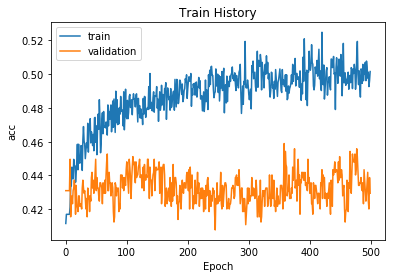

In [32]:
show_train_history(train_history,'acc','val_acc')

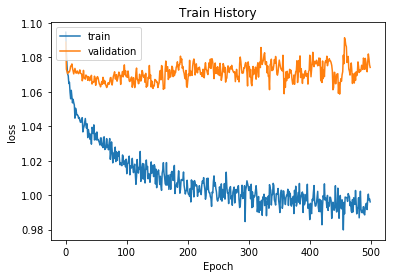

In [33]:
show_train_history(train_history,'loss','val_loss')

## 評估模型準確率

In [34]:
socres = model.evaluate(X_test, y_test)

 32/806 [>.............................] - ETA: 0s

In [35]:
print('accuracy=',socres[1])

accuracy= 0.4032258066


## 預測

In [36]:
prediction = model.predict_classes(X_test)

 32/806 [>.............................] - ETA: 0s

In [37]:
prediction

array([0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0,
       0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2,
       1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0,
       0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 1,
       1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 2, 0,
       0, 1,

In [38]:
pd.crosstab(y_test_label,prediction,colnames=['predict'],rownames=['label'])

predict,0,1,2
label,,,
0,212,66,69
1,88,70,32
2,134,92,43


## End